# Compute gradients using PyTorch

Task: compute the gradient of a simple function using PyTorch

In our activity on Wednesday, we started working with gradient-based learning. But we had to compute the gradients by a numerical approximation. That is unreliable and inefficient. Today we'll look at how PyTorch's autograd functionality lets us compute that efficiently. (Under the hood this is using backpropagation; we'll learn about that soon.

## Setup

In [2]:
import torch
from torch import tensor
import matplotlib.pyplot as plt
%matplotlib inline

We now define a function of two variables:

In [3]:
def square(x):
    return x * x

def double(x):
    return 2 * x

def f(x1, x2):
    return double(x1) + square(x2) + 5.0

We evaluate it at a few values.

In [4]:
x1 = 1.0
x2 = 2.0
f(x1, x2)

11.0

How does it change when we increment x1 by a bit?

In [6]:
f(x1 + 0.1, x2)

11.2

How does it change when we increment x2 by a bit?

In [7]:
f(x1, x2 + 0.1)

11.41

Reflection: which variable has the larger effect on the output?

`f` is a function of two variables. Let's sweep each one and see how it changes.

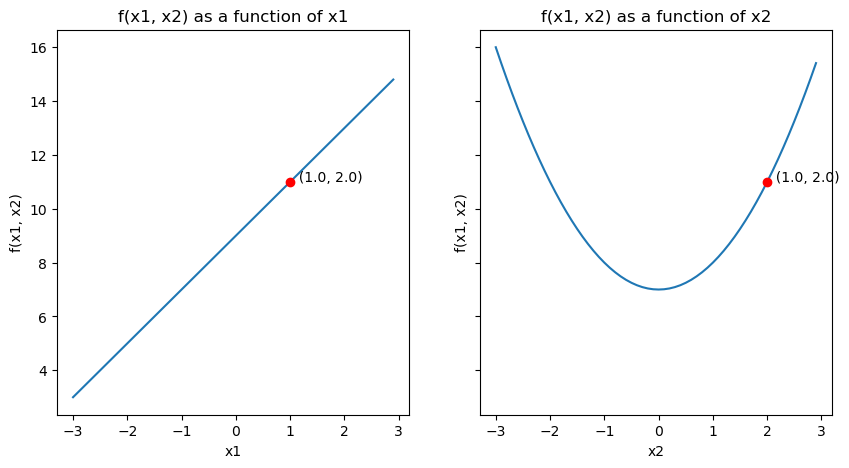

In [16]:
# make two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
# plot f(x1, x2) as a function of x1
x1s = torch.arange(-3, 3, 0.1)
x2 = 2.0
ax1.plot(x1s, f(x1s, x2))
# make a dot at the point (x1, x2)
ax1.plot(x1, f(x1, x2), 'ro')
# label the dot
ax1.text(x1, f(x1, x2), '  ({:.1f}, {:.1f})'.format(x1, x2))

ax1.set_xlabel('x1')
ax1.set_ylabel('f(x1, x2)')
ax1.set_title('f(x1, x2) as a function of x1')
# plot f(x1, x2) as a function of x2
x1 = 1.0
x2s = torch.arange(-3, 3, 0.1)
ax2.plot(x2s, f(x1, x2s))
# make a dot at the point (x1, x2)
ax2.plot(x2, f(x1, x2), 'ro')
# label the dot
ax2.text(x2, f(x1, x2), '  ({:.1f}, {:.1f})'.format(x1, x2))
ax2.set_xlabel('x2')
ax2.set_ylabel('f(x1, x2)')
ax2.set_title('f(x1, x2) as a function of x2');


At the marked point, what is the slope of the line when we increment x1 by a bit?

At the marked point, what is the slope of the line when we increment x2 by a bit?

## Task 1

Compute the gradient of `f` with respect to x1, when x1 = 1.0 and x2 = 2.0.

Steps:

1. Initialize the input tensors. Tell PyTorch to track their gradients.

In [17]:
x1 = torch.tensor(1.0, requires_grad=True)
# x2 = ...
x2 = torch.tensor(2.0, requires_grad=True)

Note that these tensors have a `grad` attribute, but it's currently `None` because we haven't yet defined what we want to compute the gradient of.

2. Call the function to get the output.

In [18]:
result = f(x1, x2)
result

tensor(11., grad_fn=<AddBackward0>)

Notice that the output is a tensor with a single element. We can get the value of that element using `.item()`. It also has a grad_fn attribute, which you'll notice is a `AddBackward0` object. This is a PyTorch object that represents the operation that was performed to get this result. We'll learn more about this later. For now, just know that it's a way for PyTorch to keep track of the computation that was performed. (This is what makes it possible to compute the gradient.) Look at the definition of `f` to see if you can figure out what *add*ition was performed.

Note that the `grad` attribute of the input tensors is still `None`. That's because we haven't yet told PyTorch to run backpropagation.

In [19]:
x1.grad, x2.grad

(None, None)

3. Call `backward` on the result. This will compute the gradient of the result with respect to the input tensors. It doesn't return anything, but it does set the `.grad` attribute of the input tensors.

In [8]:
result.backward()

The gradient is now stored in `x1.grad`.

In [9]:
x1.grad

tensor(2.)

Note: you might not get the value of 2.0 for a few reasons:

1. If you didn't call `backward` on the result, then the gradient won't be computed. Remember that Jupyter notebooks don't run cells in order, only when you tell them to. So if you run the cell that calls `backward` after the cell that prints the gradient, then the gradient won't be computed.
2. If you re-run the `result =` line and run `backward` again, then the gradient will be added to the previous value. So you'll get 2.0 + 2.0 = 4.0. To fix this, you can either restart the kernel and run all the cells again, or you can call `zero_grad` on the input tensors before calling `backward`.

Check that this value matches the slope of the line at the marked point. (Which slope are we talking about? The one when we increment x1 by a bit, or the one when we increment x2 by a bit?)

## Task 2

Compute the gradient of `f` with respect to **x2**, when x1 = 1.0 and x2 = 2.0. (i.e., same point, but evaluating the gradient wrt a different parameter.)

In [10]:
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(2.0, requires_grad=True)

In [20]:
# your code here
result = f(x1, x2)
result.backward()
x2.grad

tensor(4.)

Check that this value matches the slope of the line at the marked point. (Which slope are we talking about? The one when we increment x1 by a bit, or the one when we increment x2 by a bit?)

## Analysis

Repeat both tasks above for several other values of `x1` and `x2`. Also look at the definition of `f` and recall what you learned about derivatives in Calculus. Based on that:

1. **Write a *simple* mathematical expression that evaluates to the value of x1.grad for any values of x1 and x2.** Use only basic math operations like `+` or `*`; don't use any autograd functionality (like `.backward()`). **The correct solution here is extremely simple!**

In [12]:
# x1_grad = ...
x1_grad = 2.0

2. **Write a simple mathematical expression that evaluates to the value of x2.grad for any values of x1 and x2.**

Make sure that you understand why this is different from the value of `x1.grad`.

In [13]:
# x2_grad = ...
x2_grad = 2 * x2